In [1]:
#Import various libraries needed for the analysis
import pandas as pd
import numpy as np
import mlxtend
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
#import dataset
data = pd.read_csv('C:/Users/HP/Desktop/Utiva/Project 1/Market Basket Analysis - Groceries_dataset.csv')

In [4]:
#display dataset
data.head(10)

,Member_number,Date,Item_description
0,1808,21/07/2015,tropical fruit
1,2552,1/5/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,2/1/2015,whole milk
5,4941,14/02/2015,rolls/buns
6,4501,5/8/2015,other vegetables
7,3803,23/12/2015,pot plants
8,2762,20/03/2015,whole milk
9,4119,2/12/2015,tropical fruit


In [5]:
pivot_table = pd.pivot_table(data, index='Member_number', columns='Item_description', aggfunc='size', fill_value=0)

In [6]:
data2 =pivot_table.applymap(lambda x:1 if x >0 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_10264\2013932986.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2 =pivot_table.applymap(lambda x:1 if x >0 else 0)


In [7]:
#view the data shape
data.shape

(38765, 3)

In [9]:
most_purchased_items = apriori(data2, min_support=0.005, use_colnames=True)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
rules = association_rules(most_purchased_items, metric='lift')
rules.sort_values(by='zhangs_metric', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
197,(whole milk),"(bottled water, other vegetables)",0.458184,0.093894,0.056183,0.122620,1.305941,0.013162,1.032741,0.432376
239,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235,0.429190
251,(whole milk),"(rolls/buns, yogurt)",0.458184,0.111339,0.065931,0.143897,1.292420,0.014917,1.038030,0.417592
199,(other vegetables),"(whole milk, bottled water)",0.376603,0.112365,0.056183,0.149183,1.327657,0.013865,1.043273,0.395885
198,(bottled water),"(whole milk, other vegetables)",0.213699,0.191380,0.056183,0.262905,1.373732,0.015285,1.097036,0.345995


In [12]:
item_association = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
item_association

consequents,(other vegetables),(pip fruit),(pork),(sausage),(shopping bags),(whipped/sour cream),"(bottled water, other vegetables)","(whole milk, other vegetables)","(whole milk, bottled water)","(other vegetables, rolls/buns)",...,(canned beer),(chicken),(citrus fruit),(coffee),(curd),(domestic eggs),(frankfurter),(frozen vegetables),(margarine),"(soda, yogurt)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(beef),0.129082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(pip fruit),0.134929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(pork),0.120423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(sausage),0.207314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271949,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(shopping bags),0.160094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(whipped/sour cream),0.153692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(whole milk, bottled water)",0.278035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(whole milk, other vegetables)",0.000000,0.000000,0.000000,0.267032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(bottled water, other vegetables)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
import matplotlib.pyplot as plt

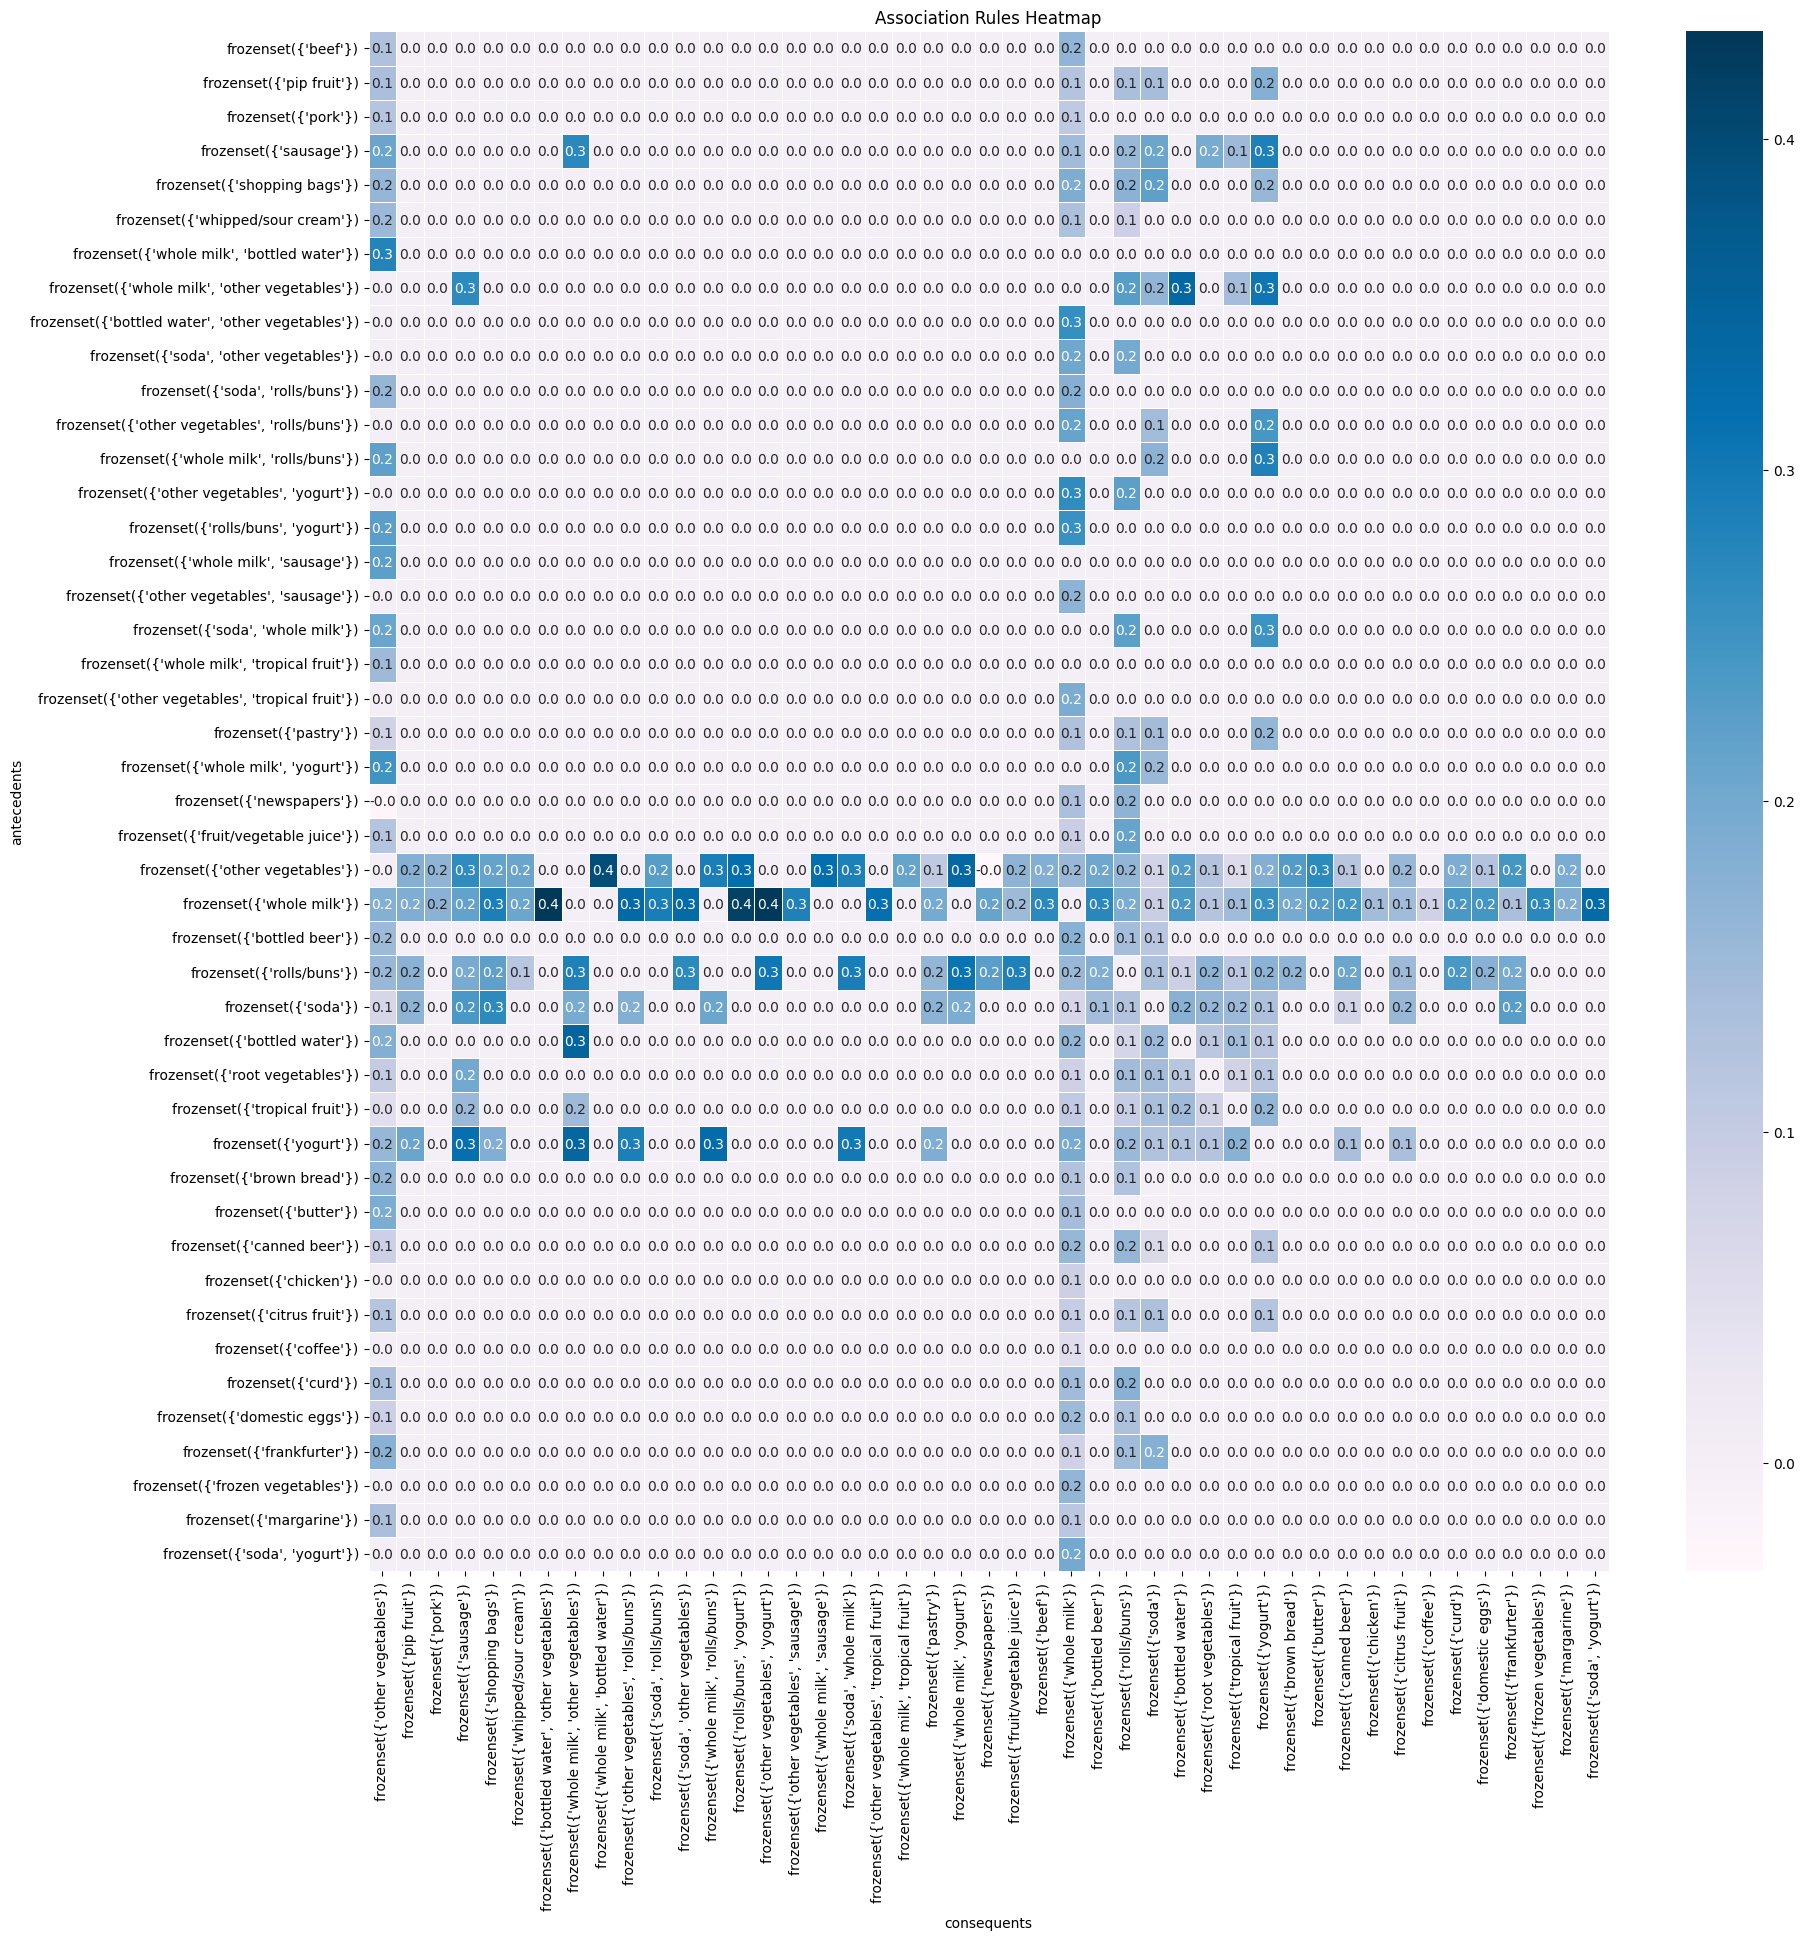

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(item_association,annot=True, cmap='PuBu', fmt= '.1f', linewidths=.5)
plt.title('Frequently Bought Together'and 'Association Rules Heatmap')
plt.show()

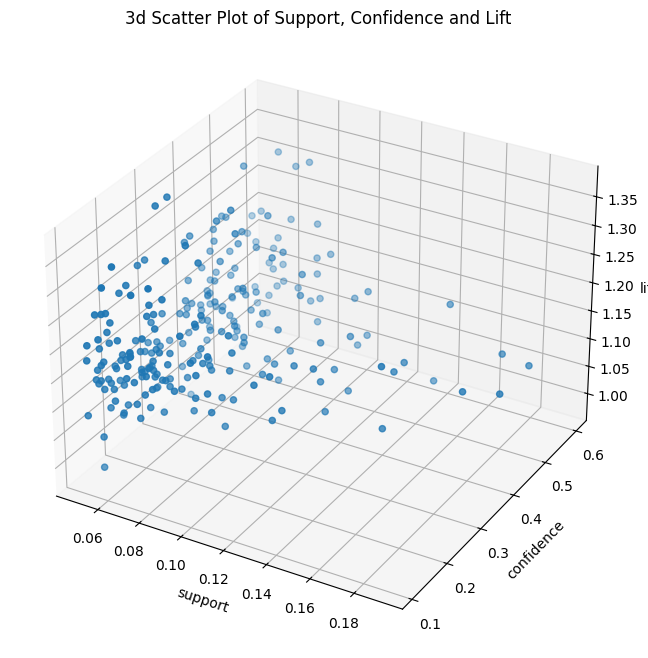

In [15]:
#3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rules['support'], rules['confidence'], rules['lift'])
ax.set_xlabel('support')
ax.set_ylabel('confidence')
ax.set_zlabel('lift')
plt.title('3d Scatter Plot of Support, Confidence and Lift')
plt.show()

In [ ]:
Market Basket Analysis is a data mining techniques used in retail to discover association and patterns 
in customers' purchasing behavior. 
The goal of market basket analysis is to identify which items are 
frequently purchased together and to use this information to make decisions about product placement, 
cross-selling, and other marketing strategies.

Apriori is one of the most popular algorithms for performing market basket analysis. The Apriori 
algorithm works by iteratively generating frequent itemsets that appear togethter in a significant number of transactions.

Association rules are used to identify interesting relationships between items in the dataset. They 
consist of an antecdents(a set of items that are present in the transaction) and consequents(a set of 
items that are often purchased together with the antecedents).   